Classification Project
Why are our customers churning?

Some questions I have include:

Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Resume here - answer the questions on Churn

### Deliverables:

I will also need a report (ipynb) answering the question, "Why are our customers churning?" I want to see the analysis you did to answer my questions and lead to your findings. Please clearly call out the questions and answers you are analyzing. E.g. If you find that month-to-month customers churn more, I won't be surprised, but I am not getting rid of that plan. The fact that they churn is not because they can, it's because they can and they are motivated to do so. I want some insight into why they are motivated to do so. I realize you will not be able to do a full causal experiment, but I hope to see some solid evidence of your conclusions.

I will need you to deliver to me a csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn). I would also like a single goolgle slide that illustrates how your model works, including the features being used, so that I can deliver this to the SLT when they come with questions about how these values were derived. Please make sure you include how likely your model is to give a high probability of churn when churn doesn't occur, to give a low probability of churn when churn occurs, and to accurately predict churn.

Finally, our development team will need a .py file that will take in a new dataset, (in the exact same form of the one you acquired from telco_churn.customers) and perform all the transformations necessary to run the model you have developed on this new dataset to provide probabilities and predictions.

Specification
Detailed instructions for each section are below.

In general, make sure you document your work. You don't need to explain what every line of code is doing, but you should explain what and why you are doing. For example, if you drop a feature from the dataset, you should explain why you decided to do so, or why that is a reasonable thing to do. If you transform the data in a column, you should explain why you are making that transformation.

In addition, you should not present numers in isolation. If your code outputs a number, be sure you give some context to the number.

### Specific Deliverables:

- a jupyter notebook where your work takes place
- a csv file that predicts churn for each customer
- a python script that prepares data such that it can be fed into your model
- a google slide summarizing your model
- a README.md file that contains a link to your google slides presentation, and instructions for how to use your python script(s)

# Acquisition
Get the data from the customers table from the telco_churn database on the codeup data science database server.

You may wish to join some tables as part of your query.
This data should end up in a pandas data frame.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from telco_prepare import get_telco_data
from telco_prepare import prep_telco_data

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import graphviz
from graphviz import Graph

import env

Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:

- creates dataframe object head_df (df of the first 5 rows) and prints contents to screen
- creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen
- creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen
- creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.
- prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [2]:
def peekatdata(df):
    Head_df = df.head(5)
    print('Header:  \n')
    print(Head_df)
    print('Tail:  \n')
    Tail_df = df.tail(5)
    print(Tail_df)
    print('Shape:  \n')
    Shape_tuple = df.shape
    print(Shape_tuple)
    print('Describe:  \n')
    Describe_df = df.describe()
    print(Describe_df)
    print('Info:  \n')
    print(df.info())
    return 

In [3]:
df = get_telco_data()
peekatdata(df)

Header:  

  customer_id  gender  senior_citizen partner dependents  tenure  \
0  0003-MKNFE    Male               0      No         No       9   
1  0013-MHZWF  Female               0      No        Yes       9   
2  0015-UOCOJ  Female               1      No         No       7   
3  0023-HGHWL    Male               1      No         No       1   
4  0032-PGELS  Female               0     Yes        Yes       1   

  phone_service    multiple_lines  internet_service_type_id online_security  \
0           Yes               Yes                         1              No   
1           Yes                No                         1              No   
2           Yes                No                         1             Yes   
3            No  No phone service                         1              No   
4            No  No phone service                         1             Yes   

             ...             streaming_movies contract_type_id  \
0            ...                       

# Data Prep

Write a function, df_value_counts(dataframe), that takes a dataframe as input and computes and returns the values by frequency for each column. The function should decide whether or not to bin the data for the value counts.

In [4]:
DataFeatures = ['tenure_year','monthly_charges','internet_service_type_id']

In [5]:
# Need to update with decision to bin.  Function below will give us the features with more than 10 different options, which will be the features we bin.
def df_value_counts(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('-----%s-----' %col)
        print(df[col].value_counts())
        
df_value_counts(df)

-----customer_id-----
4884-TVUQF    1
4488-PSYCG    1
4795-UXVCJ    1
3746-EUBYR    1
4056-QHXHZ    1
1627-AFWVJ    1
7673-BQGKU    1
5985-BEHZK    1
3914-FDRHP    1
6696-YDAYZ    1
6034-YMTOB    1
9318-NKNFC    1
2740-TVLFN    1
7721-DVEKZ    1
5924-SNGKP    1
5312-TSZVC    1
1577-HKTFG    1
6621-YOBKI    1
8058-INTPH    1
0637-UBJRP    1
4559-UWIHT    1
2081-VEYEH    1
4597-ELFTS    1
3680-CTHUH    1
0206-TBWLC    1
9755-JHNMN    1
6681-ZSEXG    1
9372-TXXPS    1
1982-FEBTD    1
3134-DSHVC    1
             ..
4415-IJZTP    1
5406-KGRMX    1
5699-BNCAS    1
0572-ZJKLT    1
6762-QVYJO    1
8734-FNWVH    1
5955-ERIHD    1
2091-RFFBA    1
5829-NVSQN    1
3612-YVGSJ    1
3714-JTVOV    1
4676-MQUEA    1
0422-UXFAP    1
3374-LXDEV    1
9500-WBGRP    1
4419-UJMUS    1
3340-QBBFM    1
9796-MVYXX    1
4324-BZCKL    1
6614-YOLAC    1
1297-VQDRP    1
7422-WNBTY    1
7219-TLZHO    1
6732-FZUGP    1
0774-IFUVM    1
8760-ZRHKE    1
2898-MRKPI    1
5774-XZTQC    1
7101-HRBLJ    1
0363-SVHYR    1
Na

In [6]:
def df_value_counts_bin(dataframe):
    df_cols = dataframe.columns
    features_to_bin = []
    for col in df_cols:
#         print('-----%s-----' %col)
#         print(df[col].value_counts())
        if df[col].value_counts().count() > 10:
            features_to_bin.append(col)
        print(features_to_bin[-1:])
        
df_value_counts_bin(df)

['customer_id']
['customer_id']
['customer_id']
['customer_id']
['customer_id']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['monthly_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']


### Handle Missing Values

Explore the data and see if there are any missing values.

Write a function that accepts a dataframe and returns the names of the columns that have missing values, and the percent of missing values in each column that has missing values.

In [7]:
def missing_values(dataframe):
    df_cols = df.columns
    col_name = []
    null_values = []
    null_percents = []
    for col in df_cols:
        value = df[col].isnull().sum()
        null_percent = value / df[col].count()
        col_name.append(col)
        null_values.append(value)
        null_percents.append(null_percent)

    null_tuples = list(zip(col_name, null_values, null_percents))
    null_df = pd.DataFrame(null_tuples, columns = ['Feature', 'Null_Count', 'Null_Percent'])

    print(type(null_df))
    print(null_df)  
    
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

In [8]:
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

The function below will sort each column and output the head and tail for that column.  This will let us see if there's something fishy about any of data in each column.

In [9]:
def sort_col_val(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('Sorted by ' + str(col) + ':')
        print('Head:')
        print(df[[col]].sort_values(by=[col]).head().T)
        print(' ')
        print('Tail: ')
        print(df[[col]].sort_values(by=[col]).tail().T)
        print('-----')

In [10]:
sort_col_val(df)

Sorted by customer_id:
Head:
                   1223        0           2421        2422        2423
customer_id  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ
 
Tail: 
                   1792        4548        1222        2419        2420
customer_id  9987-LUTYD  9992-RRAMN  9992-UJOEL  9993-LHIEB  9995-HOTOH
-----
Sorted by gender:
Head:
          3521    5577    2895    2897    2899
gender  Female  Female  Female  Female  Female
 
Tail: 
        3095  3094  3092  3122  7042
gender  Male  Male  Male  Male  Male
-----
Sorted by senior_citizen:
Head:
                0     4703  4702  4701  4700
senior_citizen     0     0     0     0     0
 
Tail: 
                4542  4540  4537  2259  5117
senior_citizen     1     1     1     1     1
-----
Sorted by partner:
Head:
        0    3776 3775 3773 3772
partner   No   No   No   No   No
 
Tail: 
        4104 1385 4107 4087 7042
partner  Yes  Yes  Yes  Yes  Yes
-----
Sorted by dependents:
Head:
           0    4065 4063 4062 406

Looking at the above output, something seems odd about the lower end of total_charges.  Below, I am checking for values that are whitespace, or ' '.  We have 11 rows without an actual amount in total_charges.

In [11]:
df.loc[(df['total_charges'] == ' ')].T

,1878,1949,2029,2048,2132,6143,6569,6605,6615,6686,6895
customer_id,1371-DWPAZ,2775-SEFEE,4075-WKNIU,4472-LVYGI,5709-LVOEQ,2923-ARZLG,2520-SGTTA,3115-CZMZD,3213-VVOLG,4367-NUYAO,7644-OMVMY
gender,Female,Male,Female,Female,Female,Male,Female,Male,Male,Male,Male
senior_citizen,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No phone service,Yes,Yes,No phone service,No,No,No,No,Yes,Yes,No
internet_service_type_id,1,1,1,1,1,3,3,3,3,3,3
online_security,Yes,Yes,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


We are now showing no empty cells.  Let's do a value_count to if anything strange is in our list now.  They are showing as 0.0 now.  Let's convert the total_charges column to a float and then drop these rows.

In [12]:
df_value_counts(df)

-----customer_id-----
4884-TVUQF    1
4488-PSYCG    1
4795-UXVCJ    1
3746-EUBYR    1
4056-QHXHZ    1
1627-AFWVJ    1
7673-BQGKU    1
5985-BEHZK    1
3914-FDRHP    1
6696-YDAYZ    1
6034-YMTOB    1
9318-NKNFC    1
2740-TVLFN    1
7721-DVEKZ    1
5924-SNGKP    1
5312-TSZVC    1
1577-HKTFG    1
6621-YOBKI    1
8058-INTPH    1
0637-UBJRP    1
4559-UWIHT    1
2081-VEYEH    1
4597-ELFTS    1
3680-CTHUH    1
0206-TBWLC    1
9755-JHNMN    1
6681-ZSEXG    1
9372-TXXPS    1
1982-FEBTD    1
3134-DSHVC    1
             ..
4415-IJZTP    1
5406-KGRMX    1
5699-BNCAS    1
0572-ZJKLT    1
6762-QVYJO    1
8734-FNWVH    1
5955-ERIHD    1
2091-RFFBA    1
5829-NVSQN    1
3612-YVGSJ    1
3714-JTVOV    1
4676-MQUEA    1
0422-UXFAP    1
3374-LXDEV    1
9500-WBGRP    1
4419-UJMUS    1
3340-QBBFM    1
9796-MVYXX    1
4324-BZCKL    1
6614-YOLAC    1
1297-VQDRP    1
7422-WNBTY    1
7219-TLZHO    1
6732-FZUGP    1
0774-IFUVM    1
8760-ZRHKE    1
2898-MRKPI    1
5774-XZTQC    1
7101-HRBLJ    1
0363-SVHYR    1
Na

In [13]:
df = prep_telco_data(df)

In [14]:
df.dtypes

customer_id                    object
gender                         object
senior_citizen                  int64
partner                        object
dependents                     object
tenure                          int64
phone_service                  object
multiple_lines                 object
internet_service_type_id        int64
online_security                object
online_backup                  object
device_protection              object
tech_support                   object
streaming_tv                   object
streaming_movies               object
contract_type_id                int64
paperless_billing              object
payment_type_id                 int64
monthly_charges               float64
total_charges                 float64
churn                          object
contract_type                  object
internet_service_type          object
payment_type                   object
percent_var_tc_from_act_tc    float64
churn_encoded                   int64
tenure_year 

Success!  Total_charges is now a float.  Let's drop the rows with 0.0.  (added to fix_telco_total_charges)

In [15]:
df.sort_values(by=['total_charges']).head().T

,6145,6010,5989,6039,5589
customer_id,2967-MXRAV,9318-NKNFC,8992-CEUEN,9975-SKRNR,1423-BMPBQ
gender,Male,Male,Female,Male,Female
senior_citizen,0,0,0,0,0
partner,Yes,No,No,No,Yes
dependents,Yes,No,No,No,Yes
tenure,1,1,1,1,1
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No
internet_service_type_id,0,0,0,0,0
online_security,No internet service,No internet service,No internet service,No internet service,No internet service


Let's create a feature that calculates estimated total_charges based on tenure * monthly_charges and gives us a percentage vs. the actual total_charges.  This will be used to check for data integrity issues. (added to fix_telco_charges)

In [16]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.222916,1.690473,2.315633,64.761692,2283.300441,1.002311,0.265370,2.697596,2.285958,1.325004,5.197927,1.265654,1.156609,0.918217
std,0.368612,24.559481,0.778877,0.833755,1.148907,30.090047,2266.771362,0.051288,0.441561,2.046623,2.017253,0.642730,2.291213,1.274126,1.299851,1.134951
min,0.000000,0.000000,0.000000,1.000000,1.000000,18.250000,18.800000,0.635545,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,401.450000,0.980813,0.000000,0.750000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,1.000000,1.000000,2.000000,70.350000,1397.475000,1.000000,0.000000,2.416667,2.000000,1.000000,5.000000,1.000000,0.000000,0.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,3794.737500,1.020881,1.000000,4.583333,4.000000,2.000000,8.000000,2.000000,3.000000,2.000000
max,1.000000,72.000000,2.000000,3.000000,4.000000,118.750000,8684.800000,1.450628,1.000000,6.000000,6.000000,2.000000,8.000000,3.000000,3.000000,3.000000


To make things a little clearer, let's reorganize the columns so the new columns created are closer to the columns they represent/interact with.

Document your takeaways. For each variable:

- should you remove the observations with a missing value for that variable?
- should you remove the variable altogether?
- is missing equivalent to 0 (or some other constant value) in the specific case of this variable?
- should you replace the missing values with a value it is most likely to represent (e.g. Are the missing values a - result of data integrity issues and should be replaced by the most likely value?)
- Handle the missing values in the way you recommended above.

Transform churn such that "yes" = 1 and "no" = 0

In [17]:
df.sample(10).T

,1590,491,2214,5032,466,1597,2443,3516,4033,5028
customer_id,6481-LXPWL,4074-SJFFA,6754-LZUKA,8945-MUQUF,3890-RTCMS,6598-KELSS,0125-LZQXK,5052-PNLOS,7450-NWRTR,8894-JVDCV
gender,Male,Female,Male,Male,Male,Male,Male,Male,Male,Female
senior_citizen,0,0,0,0,0,0,0,0,1,0
partner,Yes,No,Yes,No,No,No,No,No,No,No
dependents,Yes,No,No,No,No,Yes,No,No,No,No
tenure,56,1,61,51,16,50,15,3,12,62
phone_service,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
multiple_lines,No phone service,No,Yes,Yes,No,No phone service,No,Yes,Yes,Yes
internet_service_type_id,1,1,1,2,1,1,2,2,2,2
online_security,No,No,No,Yes,No,Yes,No,No,No,Yes


Figure out a way to capture the information contained in phone_service and multiple_lines into a single variable of dtype int. Write a function that will transform the data and place in a new column named phone_id.  (see function get_phone_id in telco_prepare.py)

New Column:  tenure_yr,  Compute a new feature, tenure_year, that is a result of translating tenure from months to years.  (see function create_tenure_year in telco_prepare.py)

Modified Column:  internet_service_type_id,  Reordered Internet Service ID,   previously 1=DSL, 2=Fiber, 3=None    see reorder_internet_service_id to make "none" . (no internet service = 0).    now  0=None, 1=DSL, 2=Fiber 

New Column:  tenure_yr_int,  created another column (in telco_prep.py) that represents tenure_year as an integer

New Column:  combined_service_id .  (new column) Combined Features of Phone Service and Internet Service as follows:
No phone + No Internet  = 0
No phone + DSL  = 1
No phone + Fiber  = 2
Single Line + No Internet = 3
Single Line + DSL = 4
Single Line + Fiber = 5
Multi Line + No Internet = 6
Multi Line + DSL = 7
Multi Line + Fiber = 8

New Column:  household_type_id,  combined Features of Partner and Dependents as follows:  No Partner + No Dependents = 0,  No Partner + Dependents = 1, Partner + No Dependents = 2, Partner + Dependents = 3

New Column:  streaming_services, combines Features of Streaming_tv and Streaming_movies as follows:   No tv and no movies = 0,  No tv with movies = 1, Tv and no movies = 2, TV and movies = 3

New Column : online_security_backup,    combine online_security and online_backup as follows: if security is no + backup is no = 0,  if security is no and backup is yes = 1, if security is yes and backup is no = 2, if security is yes and backup is yes = 3

Split the data into train (70%) & test (30%) samples.

End of Data PREP

In [18]:
X = df.drop(['churn', 'churn_encoded'], axis=1)
y = df[['churn_encoded']]

In [19]:
train, test = train_test_split(df, random_state=123)

In [20]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train[['monthly_charges', 'total_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup
6464,0971-QIFJK,Female,0,Yes,No,69,Yes,Yes,0,No internet service,...,Bank transfer (automatic),1.019156,0,5.750000,5,2,6,2,0,0
5707,3486-KHMLI,Male,0,No,Yes,21,Yes,Yes,0,No internet service,...,Mailed check,1.110350,0,1.750000,1,2,6,1,0,0
3442,4750-ZRXIU,Female,1,No,No,4,Yes,Yes,2,No,...,Electronic check,0.939739,1,0.333333,0,2,8,0,1,0
3932,6979-ZNSFF,Female,0,No,No,8,Yes,Yes,2,No,...,Electronic check,0.913791,1,0.666667,0,2,8,0,2,0
6124,2560-QTSBS,Female,0,Yes,Yes,72,Yes,Yes,0,No internet service,...,Bank transfer (automatic),1.033546,0,6.000000,6,2,6,3,0,0


In [24]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

Variable Encoding: encode the values in each non-numeric feature such that they are numeric.

Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling are learned from the training data set.

# Data Exploration
Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

Each independent variable (except for customer_id) should be visualized in at least two plots, and at least 1 of those compares the independent variable with the dependent variable.

For each plot where x and y are independent variables, add a third dimension (where possible), of churn represented by color.

Use subplots when plotting the same type of chart but with different variables.

Adjust the axes as necessary to extract information from the visualizations (adjusting the x & y limits, setting the scale where needed, etc.)

Add annotations to at least 5 plots with a key takeaway from that plot.

Use plots from matplotlib, pandas and seaborn.

Use each of the following:

sns.heatmap
pd.crosstab (along with sns.heatmap)
pd.scatter_matrix
sns.barplot
sns.swarmplot
sns.pairplot
sns.jointplot
sns.relplot or plt.scatter
sns.distplot or plt.hist
sns.boxplot
plt.plot
Use at least one more type of plot that is not included in the list above.

What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

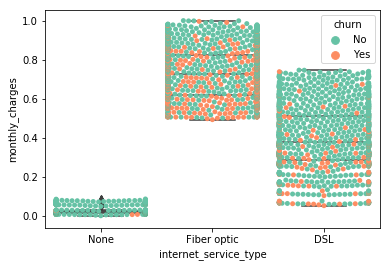

In [25]:
sns.swarmplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="internet_service_type", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

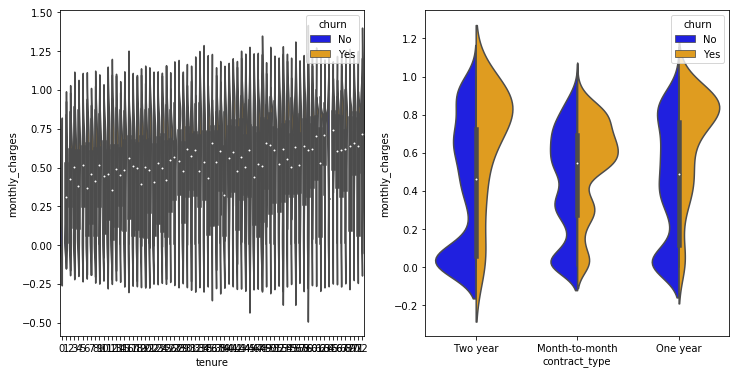

In [26]:
features = ['tenure', 'contract_type']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

# Modeling
Feature Selection: Are there any variables that seem to provide limited to no additional information? If so, remove them.

Train (fit, transform, evaluate) multiple different models, varying the model type and your meta-parameters.

In [27]:
list(df)

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'percent_var_tc_from_act_tc',
 'churn_encoded',
 'tenure_year',
 'tenure_yr_int',
 'phone_id',
 'combined_service_id',
 'household_type_id',
 'streaming_services',
 'online_security_backup']

In [28]:
def analyze_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('Accuracy of RF classifier on train set: {:.6f}'
     .format(rf.score(X_df_train, y_df_train)))
    print('-----')
    

In [29]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

In [30]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5, 6)

Results using entropy as the measure of impurity and 6 as max depth level and 5 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[0.99346513 0.00653487]
 [0.95813165 0.04186835]
 [0.34186859 0.65813141]
 [0.34732656 0.65267344]
 [0.99519264 0.00480736]]
-----
Accuracy of rf classifier on training set: 0.80159031
-----
          Pred -  Pred +
Actual -    3565     325
Actual +     723     669
-----
              precision    recall  f1-score   support

           0     0.8314    0.9165    0.8719      3890
           1     0.6730    0.4806    0.5608      1392

   micro avg     0.8016    0.8016    0.8016      5282
   macro avg     0.7522    0.6985    0.7163      5282
weighted avg     0.7897    0.8016    0.7899      5282

-----
Accuracy of RF classifier on train set: 0.801590
-----


## Best performing model on train, also did well on test.

In [31]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[0.99842408 0.00157592]
 [0.93082605 0.06917395]
 [0.31125083 0.68874917]
 [0.32431064 0.67568936]
 [0.99808842 0.00191158]]
-----
Accuracy of rf classifier on training set: 0.81427490
-----
          Pred -  Pred +
Actual -    3614     276
Actual +     705     687
-----
              precision    recall  f1-score   support

           0     0.8368    0.9290    0.8805      3890
           1     0.7134    0.4935    0.5834      1392

   micro avg     0.8143    0.8143    0.8143      5282
   macro avg     0.7751    0.7113    0.7320      5282
weighted avg     0.8043    0.8143    0.8022      5282

-----
Accuracy of RF classifier on train set: 0.814275
-----


In [32]:
def test_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(rf.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
    return Probabilities_on_X_test
    

In [33]:
test_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[0.99842408 0.00157592]
 [0.93082605 0.06917395]
 [0.31125083 0.68874917]
 [0.32431064 0.67568936]
 [0.99808842 0.00191158]]
-----
Accuracy of rf classifier on training set: 0.81427490
-----
          Pred -  Pred +
Actual -    3614     276
Actual +     705     687
-----
              precision    recall  f1-score   support

           0     0.8368    0.9290    0.8805      3890
           1     0.7134    0.4935    0.5834      1392

   micro avg     0.8143    0.8143    0.8143      5282
   macro avg     0.7751    0.7113    0.7320      5282
weighted avg     0.8043    0.8143    0.8022      5282

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -    1184     100
Actual +     262     215
-----
              precision    recall  f1-score   support

           0     0.8188    0.9221    0.8674      1284
           1     0.6825    0.4507    0.5429       477

   micro

array([[0.90714352, 0.09285648],
       [0.83877447, 0.16122553],
       [0.86667904, 0.13332096],
       ...,
       [0.48133094, 0.51866906],
       [0.9810936 , 0.0189064 ],
       [0.75196123, 0.24803877]])

## Classification/Decision Tree

In [34]:
def analyze_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')

In [35]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 5)

Results using gini as the measure of impurity and 5 as the depth.
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [0.98029557 0.01970443]
 [0.40042827 0.59957173]
 [0.40042827 0.59957173]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3520     370
Actual +     704     688
-----
              precision    recall  f1-score   support

           0     0.8333    0.9049    0.8676      3890
           1     0.6503    0.4943    0.5616      1392

   micro avg     0.7967    0.7967    0.7967      5282
   macro avg     0.7418    0.6996    0.7146      5282
weighted avg     0.7851    0.7967    0.7870      5282

-----
Accuracy of Decision Tree classifier on training set: 0.79666793
-----


In [36]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 7)

Results using gini as the measure of impurity and 7 as the depth.
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [0.96296296 0.03703704]
 [0.38218391 0.61781609]
 [0.38218391 0.61781609]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3612     278
Actual +     730     662
-----
              precision    recall  f1-score   support

           0     0.8319    0.9285    0.8776      3890
           1     0.7043    0.4756    0.5678      1392

   micro avg     0.8092    0.8092    0.8092      5282
   macro avg     0.7681    0.7021    0.7227      5282
weighted avg     0.7982    0.8092    0.7959      5282

-----
Accuracy of Decision Tree classifier on training set: 0.80916320
-----


In [37]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [0.98029557 0.01970443]
 [0.40042827 0.59957173]
 [0.40042827 0.59957173]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3520     370
Actual +     704     688
-----
              precision    recall  f1-score   support

           0     0.8333    0.9049    0.8676      3890
           1     0.6503    0.4943    0.5616      1392

   micro avg     0.7967    0.7967    0.7967      5282
   macro avg     0.7418    0.6996    0.7146      5282
weighted avg     0.7851    0.7967    0.7870      5282

-----
Accuracy of Decision Tree classifier on training set: 0.79666793
-----


In [38]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 7)

Results using entropy as the measure of impurity and 7 as the depth.
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [0.89189189 0.10810811]
 [0.32142857 0.67857143]
 [0.32142857 0.67857143]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3630     260
Actual +     758     634
-----
              precision    recall  f1-score   support

           0     0.8273    0.9332    0.8770      3890
           1     0.7092    0.4555    0.5547      1392

   micro avg     0.8073    0.8073    0.8073      5282
   macro avg     0.7682    0.6943    0.7159      5282
weighted avg     0.7961    0.8073    0.7921      5282

-----
Accuracy of Decision Tree classifier on training set: 0.80726997
-----


## KNN

In [39]:
def analyze_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')

In [40]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]]
-----
          Pred -  Pred +
Actual -    3574     316
Actual +     559     833
-----
              precision    recall  f1-score   support

           0     0.8647    0.9188    0.8909      3890
           1     0.7250    0.5984    0.6556      1392

   micro avg     0.8343    0.8343    0.8343      5282
   macro avg     0.7949    0.7586    0.7733      5282
weighted avg     0.8279    0.8343    0.8289      5282

-----
Accuracy of KNN classifier on training set: 0.83434305
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [41]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'uniform')

Results using uniform as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.16666667 0.83333333]
 [0.33333333 0.66666667]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3698     192
Actual +     735     657
-----
              precision    recall  f1-score   support

           0     0.8342    0.9506    0.8886      3890
           1     0.7739    0.4720    0.5863      1392

   micro avg     0.8245    0.8245    0.8245      5282
   macro avg     0.8040    0.7113    0.7375      5282
weighted avg     0.8183    0.8245    0.8090      5282

-----
Accuracy of KNN classifier on training set: 0.82449830
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [42]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
-----
          Pred -  Pred +
Actual -    3873      17
Actual +      76    1316
-----
              precision    recall  f1-score   support

           0     0.9808    0.9956    0.9881      3890
           1     0.9872    0.9454    0.9659      1392

   micro avg     0.9824    0.9824    0.9824      5282
   macro avg     0.9840    0.9705    0.9770      5282
weighted avg     0.9825    0.9824    0.9823      5282

-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy of KNN classifier on training set: 0.98239303
-----


In [43]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'distance')

Results using distance as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----
Head of probabilities on X_train:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
-----
          Pred -  Pred +
Actual -    3876      14
Actual +      80    1312
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


              precision    recall  f1-score   support

           0     0.9798    0.9964    0.9880      3890
           1     0.9894    0.9425    0.9654      1392

   micro avg     0.9822    0.9822    0.9822      5282
   macro avg     0.9846    0.9695    0.9767      5282
weighted avg     0.9823    0.9822    0.9821      5282

-----
Accuracy of KNN classifier on training set: 0.98220371
-----


## Test KNN that performed best on train set.  These are high numbers, let's hope for the best...

In [44]:
def test_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic KNN classifier on test set: {:.6f}'
     .format(knn.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
    return Probabilities_on_X_test

### We had some great results on the train set, but running it on the test shows that this model overfit.

In [45]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 1 0]
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Head of probabilities on X_train:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
-----
Accuracy of KNN classifier on training set: 0.98239303
-----
          Pred -  Pred +
Actual -    3873      17
Actual +      76    1316
-----
              precision    recall  f1-score   support

           0     0.9808    0.9956    0.9881      3890
           1     0.9872    0.9454    0.9659      1392

   micro avg     0.9824    0.9824    0.9824      5282
   macro avg     0.9840    0.9705    0.9770      5282
weighted avg     0.9825    0.9824    0.9823      5282

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -    1070     214
Actual +     256     221
-----
              precision    recall  f1-score   support

           0     0.8069    0.8333    0.8199      1284
           1     0.5080    0.4633    0.4846       477

   micro avg     0.7331    0.7331    0.7331      1761
   macro avg     0.6575    0.6483    0.6523      1761
weighted avg     0.7260    

array([[1.        , 0.        ],
       [0.87589782, 0.12410218],
       [1.        , 0.        ],
       ...,
       [0.17581606, 0.82418394],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## Logistic Regression

In [46]:
def analyze_log_reg(X_df_train, X_df_test, y_df_train, y_df_test, solver_name):
    features = list(X_df_train)
    
    print('Results using ' + str(solver_name) + ' as the solver.')
    print('The features being used: ' + str(features))
    print('-----')

    logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver=solver_name)
    logit.fit(X_df_train, y_df_train)
    print('-----')
    
    print('Coefficient: \n', logit.coef_)
    print('Intercept: \n', logit.intercept_)
    print('-----')

    y_df_pred = logit.predict(X_df_train)
    y_df_pred_proba = logit.predict_proba(X_df_train)
    print('Accuracy of Logistic Regression classifier on training set: {:.6f}'
         .format(logit.score(X_df_train, y_df_train)))
    print('-----')

    print('The results of running the model on the train sample:')

    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
                 columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

In [47]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'saga')

Results using saga as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.54185925 -0.14269989  1.35166861]]
Intercept: 
 [-0.90128291]
-----
Accuracy of Logistic Regression classifier on training set: 0.761265
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3054     836
Actual +     425     967
-----
              precision    recall  f1-score   support

           0     0.8778    0.7851    0.8289      3890
           1     0.5363    0.6947    0.6053      1392

   micro avg     0.7613    0.7613    0.7613      5282
   macro avg     0.7071    0.7399    0.7171      5282
weighted avg     0.7878    0.7613    0.7700      5282

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'liblinear')

Results using liblinear as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.54223679 -0.14072991  1.34873576]]
Intercept: 
 [-0.89660535]
-----
Accuracy of Logistic Regression classifier on training set: 0.761265
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3054     836
Actual +     425     967
-----
              precision    recall  f1-score   support

           0     0.8778    0.7851    0.8289      3890
           1     0.5363    0.6947    0.6053      1392

   micro avg     0.7613    0.7613    0.7613      5282
   macro avg     0.7071    0.7399    0.7171      5282
weighted avg     0.7878    0.7613    0.7700      5282

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compare evaluation metrics across all the models, and select the best performing model.

Test the final model (transform, evaluate) on your out-of-sample data (the testing data set). Summarize the performance. Interpret your results.